**Gain practice with Plotly and Sprak libraries**

In [1]:
! pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 18.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d arjunprasadsarkhel/2021-olympics-in-tokyo
!unzip 2021-olympics-in-tokyo.zip

  0% 0.00/348k [00:00<?, ?B/s]
100% 348k/348k [00:00<00:00, 71.2MB/s]
Archive:  2021-olympics-in-tokyo.zip
  inflating: Athletes.xlsx           
  inflating: Coaches.xlsx            
  inflating: EntriesGender.xlsx      
  inflating: Medals.xlsx             
  inflating: Teams.xlsx              


In [3]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=b9771336615b505720f3b6aa6bcdd409a7e5e7644476286e20ad3e0aa9210f0a
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [4]:
import pyspark
spark = pyspark.sql.SparkSession(pyspark.SparkContext())
spark

In [5]:
import pandas as pd


In [6]:
def excel_to_csv(name):
  pd.read_excel(name + '.xlsx').to_csv(name + '.csv', sep=',', index=False)

In [7]:
excel_to_csv('Athletes')
excel_to_csv('Coaches')
excel_to_csv('EntriesGender')
excel_to_csv('Medals')
excel_to_csv('Teams')

/usr/local/lib/python3.9/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.9/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [8]:
athletes = pd.read_csv('Athletes.csv')
coaches = pd.read_csv('Coaches.csv')
entries_gender = pd.read_csv('EntriesGender.csv')
medals = pd.read_csv('Medals.csv')
teams = pd.read_csv('Teams.csv')

In [9]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [10]:
medals.sort_values('Rank by Total', inplace=True)


In [11]:
import plotly.express as px

In [12]:
fig = px.bar(medals, x='Team/NOC', y=["Gold", "Silver", "Bronze"], color_discrete_sequence=["Gold", "Silver", "Brown"] ,title="Number of Medals per country")
fig.show()

In [13]:
coaches.head(5)

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [14]:
spark.read.csv('Coaches.csv', header=True, inferSchema=True).createOrReplaceTempView('Coaches')
spark.sql('Select * from Coaches').show(5)

+---------------+-------------+----------+-----+
|           Name|          NOC|Discipline|Event|
+---------------+-------------+----------+-----+
|ABDELMAGID Wael|        Egypt|  Football| null|
|      ABE Junya|        Japan|Volleyball| null|
|  ABE Katsuhiko|        Japan|Basketball| null|
|   ADAMA Cherif|Côte d'Ivoire|  Football| null|
|     AGEBA Yuya|        Japan|Volleyball| null|
+---------------+-------------+----------+-----+
only showing top 5 rows



In [15]:
pd_coaches_query = spark.sql('select NOC, COUNT(NOC) AS Count FROM Coaches GROUP BY NOC ORDER BY NOC').toPandas()
pd_coaches_query.head(7)

,NOC,Count
0,Angola,1
1,Argentina,11
2,Australia,22
3,Austria,3
4,Bahrain,1
5,Belarus,1
6,Belgium,5


In [16]:
fig = px.bar(pd_coaches_query, x='NOC', y='Count', color='Count', title='Number of coaches from each country')
fig.show()

In [17]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [18]:
spark.read.csv('Athletes.csv', header=True, inferSchema=True).createOrReplaceTempView('Athletes')
spark.sql('select * from athletes ORDER BY NOC, Discipline').show(7)

+--------------------+-----------+-------------------+
|                Name|        NOC|         Discipline|
+--------------------+-----------+-------------------+
|NOOR ZAHI Sha Mah...|Afghanistan|          Athletics|
|       YOUSOFI Kimia|Afghanistan|          Athletics|
|        YOVARI Mahdi|Afghanistan|           Shooting|
|        ANWARI Fahim|Afghanistan|           Swimming|
|     MANSOURI Farzad|Afghanistan|          Taekwondo|
|       PETROV Matvei|    Albania|Artistic Gymnastics|
|       SMAJLAJ Izmir|    Albania|          Athletics|
+--------------------+-----------+-------------------+
only showing top 7 rows



In [19]:
spark.sql('''
select first(NOC) as NOC, first(Discipline) AS Discipline, COUNT(*) AS Count
FROM Athletes
GROUP BY NOC, Discipline
ORDER BY NOC, Discipline''').show(20)

+-----------+-------------------+-----+
|        NOC|         Discipline|Count|
+-----------+-------------------+-----+
|Afghanistan|          Athletics|    2|
|Afghanistan|           Shooting|    1|
|Afghanistan|           Swimming|    1|
|Afghanistan|          Taekwondo|    1|
|    Albania|Artistic Gymnastics|    1|
|    Albania|          Athletics|    1|
|    Albania|               Judo|    1|
|    Albania|           Shooting|    1|
|    Albania|           Swimming|    2|
|    Albania|      Weightlifting|    2|
|    Algeria|          Athletics|    8|
|    Algeria|             Boxing|    8|
|    Algeria|       Canoe Sprint|    1|
|    Algeria|       Cycling Road|    2|
|    Algeria|            Fencing|    3|
|    Algeria|               Judo|    2|
|    Algeria|  Marathon Swimming|    1|
|    Algeria|             Rowing|    2|
|    Algeria|            Sailing|    2|
|    Algeria|           Shooting|    1|
+-----------+-------------------+-----+
only showing top 20 rows



In [20]:
pd_athletes_query = spark.sql('''
select first(NOC) as NOC, first(Discipline) AS Discipline, COUNT(*) AS Count
FROM Athletes
GROUP BY NOC, Discipline
ORDER BY NOC, Discipline''').toPandas()

In [21]:
fig = px.bar(pd_athletes_query, x='NOC', y='Count', color='Discipline', title='Number of Athletes from each country grouped by discipline')
fig.show()

In [22]:
athletes['Discipline'].value_counts().head(10)

Athletics       2068
Swimming         743
Football         567
Rowing           496
Hockey           406
Judo             373
Handball         343
Shooting         342
Sailing          336
Rugby Sevens     283
Name: Discipline, dtype: int64

In [23]:
pd_athletes_query = pd_athletes_query.loc[pd_athletes_query['Discipline'].isin(['Athletics', 'Swimming', 'Football'])]
pd_athletes_query.Discipline.value_counts()

Athletics    195
Swimming     181
Football      24
Name: Discipline, dtype: int64

In [24]:
fig = px.bar(pd_athletes_query, x='NOC', y='Count', color='Discipline', title='Number of Athletes from each country grouped by discipline')
fig.show()

In [25]:
entries_gender.head(5)

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

specs = [[{'type':'domain'}, {'type':'domain'}]] * 23
fig = make_subplots(rows=23, cols=2, subplot_titles=entries_gender["Discipline"], specs=specs)
sub_figs = []
for index, row in entries_gender.iterrows():
  sub_fig = go.Pie(labels=['Female', 'Male'], values=[row['Female'], row['Male']])
  sub_figs.append(sub_fig)

k = 0
for i in range(1, 24):
  for j in range(1, 3):
    fig.add_trace(sub_figs[k], i, j)
    k += 1

fig.update_layout(showlegend=False, height=10000, width=800, title_text="Distribution of gender amongst each game")
fig.update_traces(textposition='inside', textinfo='label+percent', hoverinfo='label+value+percent')
fig = go.Figure(fig)
fig.show()

In [27]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [28]:
import seaborn as sns

In [29]:
new_teams = teams.loc[teams["Discipline"].isin(["Swimming", "Athletes", "Cycling Track", "Archery", "Fencing"])]

<Axes: >

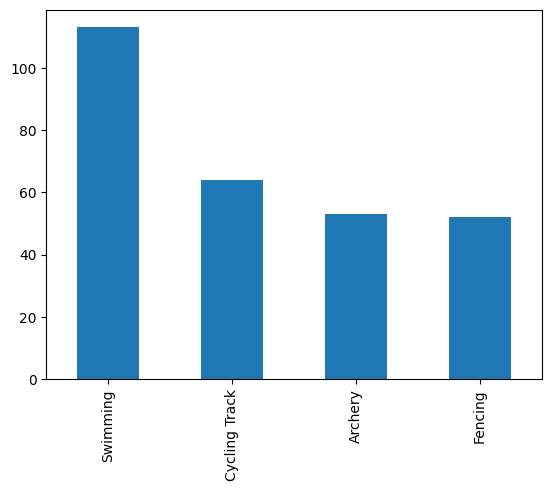

In [30]:
new_teams['Discipline'].value_counts().plot(kind='bar')